In this notebook we will be loading the images in the training test and validation datasets, then wrangling the image datasets

We will be first loading the libraries that we will need

In [7]:
import cv2
import os
import glob
import matplotlib.pyplot as plt
import numpy as np


After importing the necessary libraries, I need to look at loading all the files. I need to look at the training, test and validation datasets.
Let us look at the training dataset first

In [2]:
training_folder_normal= '/Users/mks9338/Documents/Course/Capstone_three/chest_xray/train/NORMAL/'
training_folder_pneumonia= '/Users/mks9338/Documents/Course/Capstone_three/chest_xray/train/PNEUMONIA/'

We will take the file names from the folder for training pneumonia and normal in a list.

In [3]:
image_paths_normal = glob.glob(training_folder_normal + '*.jpeg')
image_paths_pneumonia = glob.glob(training_folder_pneumonia + '*.jpeg')



In [4]:
print("Number of training images which are normal", len(image_paths_normal))
print("Number of training images which are pneumonia", len(image_paths_pneumonia))


Number of training images which are normal 1341
Number of training images which are pneumonia 3875


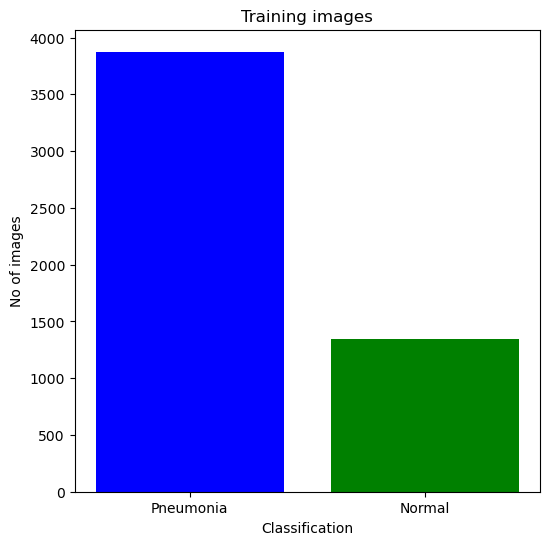

In [18]:
training_values={"Pneumonia":len(image_paths_pneumonia),"Normal":len(image_paths_normal)}
plt.figure(figsize=(6,6))
plt.bar(x=list(training_values.keys()),height=list(training_values.values()),color=["Blue","Green"])
plt.xlabel("Classification")
plt.ylabel("No of images")
plt.title("Training images")
plt.savefig('/Users/mks9338/Documents/Course/Capstone_three/Balancingplot_training.png')
plt.show()


We can see that this is an imbalanced dataset with the number of pneumonia images approximately three times that of the normal images. This will need to be corrected before applying any classification model.
We will visualise some of the Normal and pneumonia images from the training dataset 

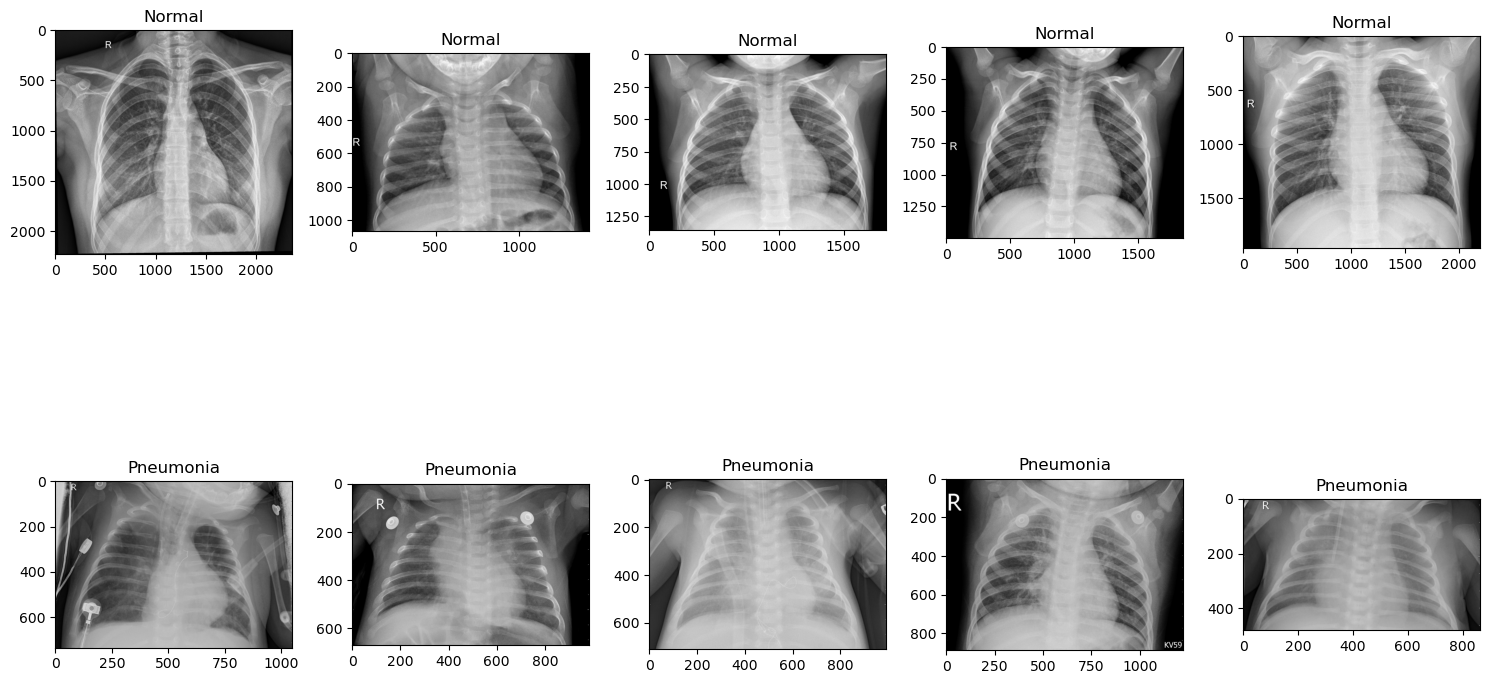

In [6]:
Normal_images=image_paths_normal[0:5]
Pneumonia_images=image_paths_pneumonia[0:5]
Images=Normal_images+Pneumonia_images
cols=5
rows=2
plt.figure(figsize=(15,10))
for i in range(10):
    img=cv2.imread(Images[i])
    plt.subplot(rows,cols,i+1)
    plt.imshow(img)
    if i<5:
        plt.title("Normal")
    else:
        plt.title("Pneumonia")
plt.tight_layout()
plt.show()

You can see based on the axes that the sizes vary from image to image, which means that each of the images is not the same size and the images will have to be resized to make them equal.

We know that the training dataset is imbalanced and will require balancing. We know that the images will have to be resized to make them equal. 

Now as part of our preprocessing, let us see how images will look like if we  resize them.
We will resize the images to 224x224 which is a standard that is used.

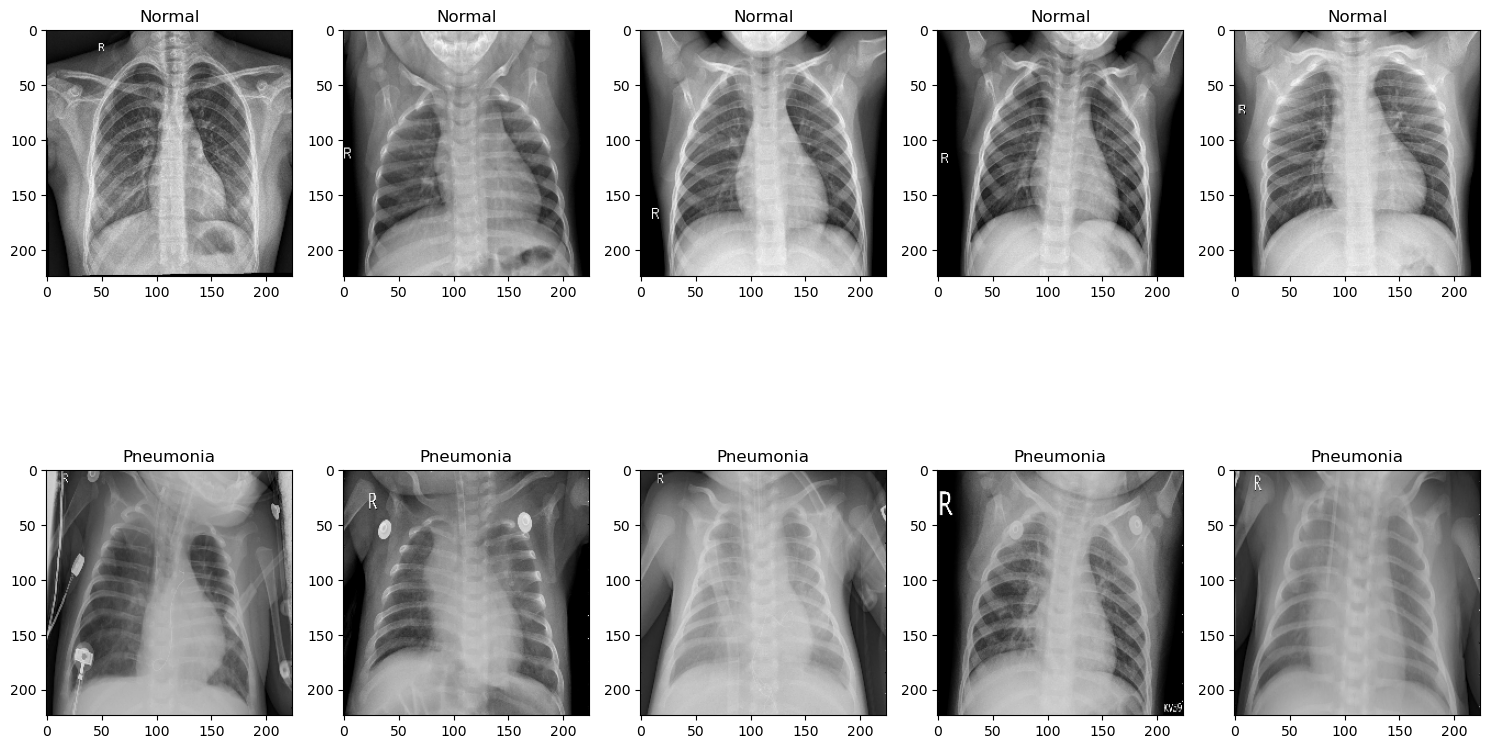

In [8]:
cols=5
rows=2
plt.figure(figsize=(15,10))
for i in range(10):
    img=cv2.imread(Images[i])
    img_resize=cv2.resize(img,(224,224))
    plt.subplot(rows,cols,i+1)
    plt.imshow(img_resize)
    if i<5:
        plt.title("Normal")
    else:
        plt.title("Pneumonia")
plt.tight_layout()
plt.show()

Now we will look at the test and validation datasets to process them 
First let us look at number of images in the test data set.

In [10]:
testing_folder_normal= '/Users/mks9338/Documents/Course/Capstone_three/chest_xray/test/NORMAL/'
testing_folder_pneumonia= '/Users/mks9338/Documents/Course/Capstone_three/chest_xray/test/PNEUMONIA/'
image_paths_normal_test = glob.glob(testing_folder_normal + '*.jpeg')
image_paths_pneumonia_test = glob.glob(testing_folder_pneumonia + '*.jpeg')
print("Number of testing images which are normal", len(image_paths_normal_test))
print("Number of testing images which are pneumonia", len(image_paths_pneumonia_test))

Number of testing images which are normal 234
Number of testing images which are pneumonia 390


We can visualise the images for the testing dataset after resizing them.

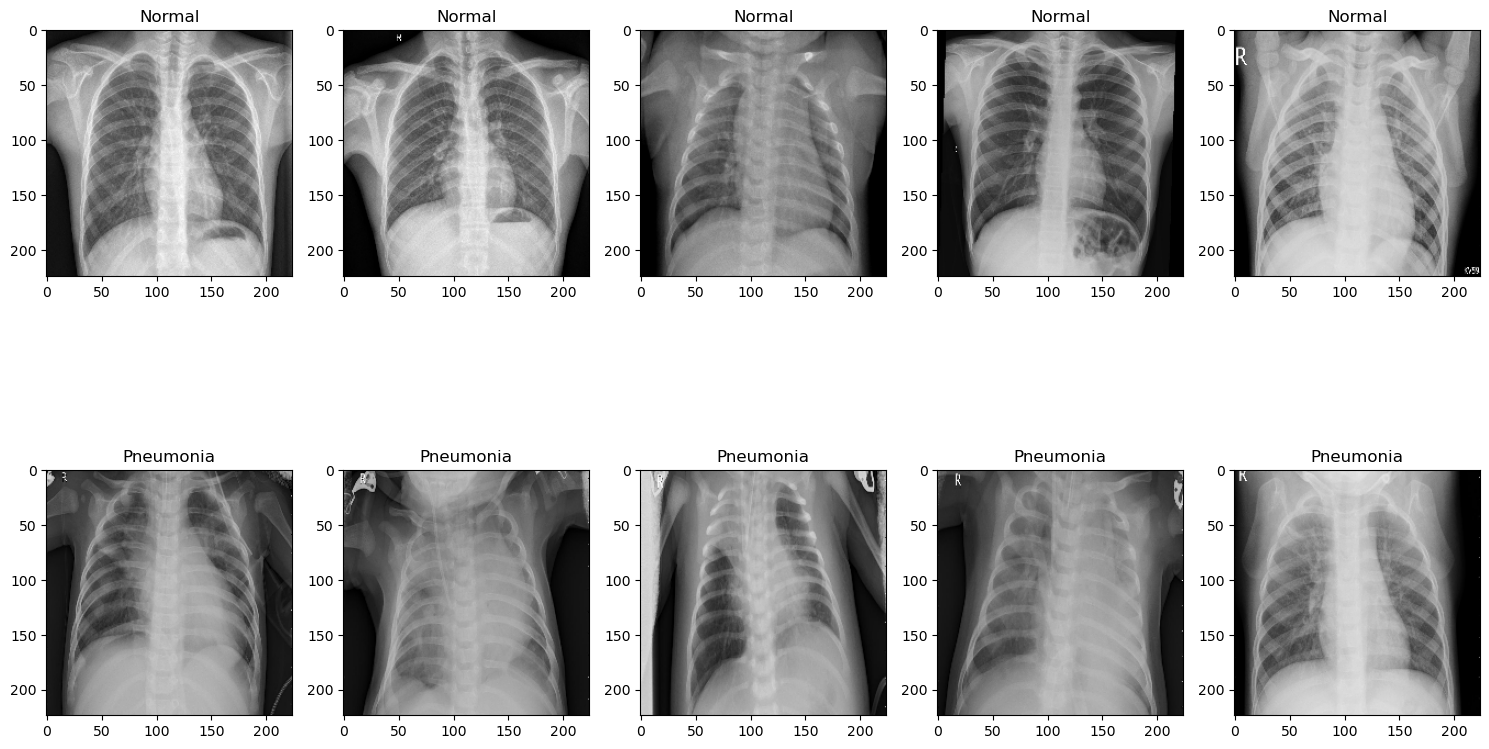

In [12]:
Normal_images_test=image_paths_normal_test[0:5]
Pneumonia_images_test=image_paths_pneumonia_test[0:5]
Images_test=Normal_images_test+Pneumonia_images_test

cols=5
rows=2
plt.figure(figsize=(15,10))
for i in range(10):
    img=cv2.imread(Images_test[i])
    img_resize=cv2.resize(img,(224,224))
    plt.subplot(rows,cols,i+1)
    plt.imshow(img_resize,cmap="gray")
    if i<5:
        plt.title("Normal")
    else:
        plt.title("Pneumonia")
plt.tight_layout()
plt.show()

There is a validation dataset that has been provided and we should look at 

In [13]:
validation_folder_normal= '/Users/mks9338/Documents/Course/Capstone_three/chest_xray/val/NORMAL/'
validation_folder_pneumonia= '/Users/mks9338/Documents/Course/Capstone_three/chest_xray/val/PNEUMONIA/'
image_paths_normal_validation = glob.glob(validation_folder_normal + '*.jpeg')
image_paths_pneumonia_validation = glob.glob(validation_folder_pneumonia + '*.jpeg')
print("Number of validation images which are normal", len(image_paths_normal_validation))
print("Number of validation images which are pneumonia", len(image_paths_pneumonia_validation))

Number of validation images which are normal 8
Number of validation images which are pneumonia 8
